In [1]:
#ML Assignment

#Student Id : C21083689
#Student name : Abhishek Saurav

In [2]:
!pip3 install imblearn
!pip install scikit-plot

In [1]:
#import dataset and common library

# Common imports
import numpy as np
from numpy import sqrt 
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#import csv file
ecomm = pd.read_csv('/Users/abhisaurav/Desktop/Cardiff MSc/Datasets/Coursework_1_data.csv')

# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
#Exploratory Data Analysis

In [5]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
ecomm.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

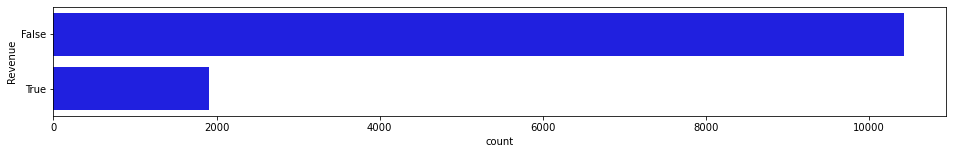

In [7]:
# Checking balancing of outcome feature

plt.figure(figsize=(16,2))
fig = sns.countplot(y="Revenue", data=ecomm, color='b')
plt.show()


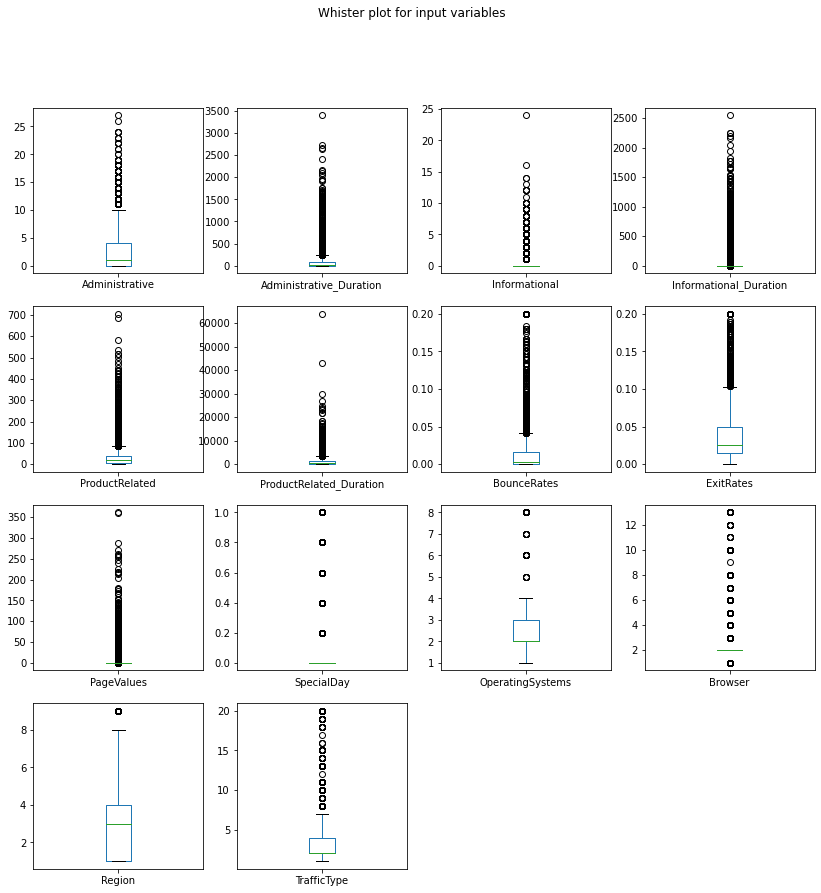

In [8]:
# Checking outliers using Whiskerplots
c= 'black'
ecomm.drop('Revenue', axis=1).plot(kind='box', 
                                subplots=True, layout=(4,4), 
                                sharex=False, sharey=False, 
                                figsize=(14,14), 
                                title='Whister plot for input variables')
plt.show()

In [9]:
#for identifying the outliers

i=99
while i<=100:
    print("{} percentile value {}".format(i, np.percentile(ecomm['PageValues'],i)))
    i+=0.1

99 percentile value 85.49849043159924
99.1 percentile value 87.94942655607008
99.19999999999999 percentile value 92.61334866783949
99.29999999999998 percentile value 97.65956467431887
99.39999999999998 percentile value 103.06314208719985
99.49999999999997 percentile value 110.39186412399451
99.59999999999997 percentile value 116.22477979679844
99.69999999999996 percentile value 129.13260850998884
99.79999999999995 percentile value 153.48922959739934
99.89999999999995 percentile value 217.2812699786763
99.99999999999994 percentile value 361.76374189999405


In [10]:
# Replacing Outliers above 99.9 percentile with median of the column

val= ecomm['Administrative'].median()
ecomm['Administrative']= ecomm['Administrative'].apply(lambda x : val if x > 18 else x)

val= ecomm['Administrative_Duration'].median()
ecomm['Administrative_Duration']= ecomm['Administrative_Duration'].apply(lambda x : val if x >= 3000 else x)

val= ecomm['Informational_Duration'].median()
ecomm['Informational_Duration']= ecomm['Informational_Duration'].apply(lambda x : val if x >= 2400 else x)

val= ecomm['ProductRelated'].median()
ecomm['ProductRelated']= ecomm['ProductRelated'].apply(lambda x : val if x >= 250 else x)

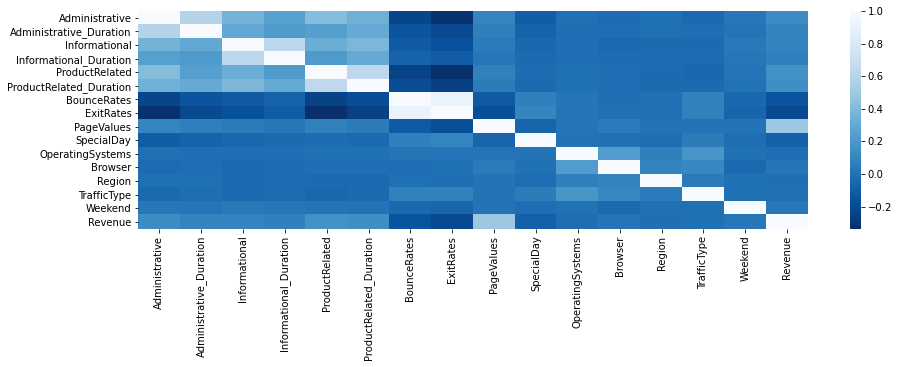

In [11]:
# Feature correlation
plt.figure(figsize=(15,4))
f_cor = ecomm.corr()
sns.heatmap(f_cor, cmap="Blues_r")

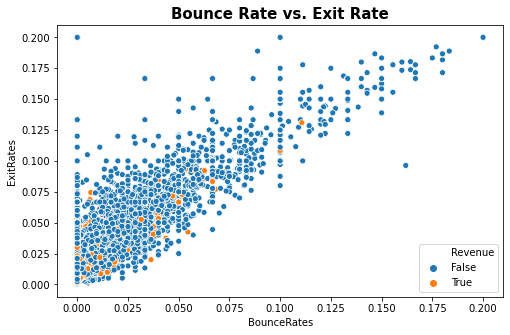

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=ecomm,hue='Revenue')
plt.title('Bounce Rate vs. Exit Rate', fontweight='bold', fontsize=15)
plt.show()

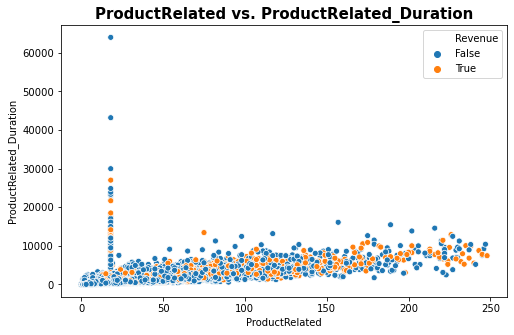

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'ProductRelated',y='ProductRelated_Duration',data=ecomm,hue='Revenue')
plt.title('ProductRelated vs. ProductRelated_Duration', fontweight='bold', fontsize=15)
plt.show()

In [14]:
# Data Preprocessing

In [15]:
#dropping one of the highly correlated columns
ecomm = ecomm.drop(['ProductRelated_Duration','ExitRates'],axis = 1)

In [16]:
#change boolean features to integer
ecomm['Weekend'] = ecomm['Weekend'].replace((True, False), (1, 0))
ecomm['Revenue'] = ecomm['Revenue'].replace((True, False), (1, 0))

In [17]:
# create training and test data

ecomm_x = ecomm.drop(['Revenue'],axis = 1)
ecomm_y = ecomm['Revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecomm_x, ecomm_y, test_size=0.25, random_state=101)

In [18]:
# preprocessing using one-hot encoder and column transformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# transformer for categorical features

categorical_features = ('Month','Browser', 'Region', 'TrafficType','VisitorType','OperatingSystems')
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore')),
    ]
)

#transformer for numerical features

numeric_features = ('ProductRelated', 'BounceRates','PageValues', 'SpecialDay', 'Administrative', 
                    'Administrative_Duration', 'Informational', 'Informational_Duration')
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler()),
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],remainder='passthrough'
)

In [19]:
# importing libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import scikitplot as skplt

In [20]:
# Random Forest Classification with feature selection and hyper Parameter Tuning

accuracy_score: 0.9020434641582874
roc_auc_score: 0.8475195094760312
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2600
           1       0.66      0.77      0.71       483

    accuracy                           0.90      3083
   macro avg       0.81      0.85      0.83      3083
weighted avg       0.91      0.90      0.90      3083

[[2410  190]
 [ 112  371]]


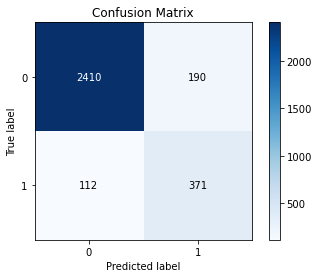

In [21]:
rnd_class = imbpipeline(
    [
     ('preprocessing', preprocessor),
     ('smote', SMOTE(random_state=1)),
     ('feature_selection', SelectKBest(score_func=f_classif, k=25)),
     ('classifier', RandomForestClassifier(n_estimators = 500,min_samples_split = 10,
                                           min_samples_leaf = 4,max_depth = 20,
                                           bootstrap = False,random_state=42))
    ]
)

#Model Evaluation

rnd_class.fit(X_train, y_train)
y_pred_rnd = rnd_class.predict(X_test)
print("accuracy_score:",accuracy_score(y_test, y_pred_rnd))
print("roc_auc_score:",roc_auc_score(y_test, y_pred_rnd))
print(classification_report(y_test, y_pred_rnd))
print(confusion_matrix(y_test, y_pred_rnd))


plt_1 = skplt.metrics.plot_confusion_matrix(y_test1, y_pred_rnd, normalize=False)

In [22]:
# Bagging Decision tree Classfier with feature selection and hyper parameter tuning

accuracy_score: 0.8906908855011353
roc_auc_score: 0.8542749641662685
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2600
           1       0.62      0.80      0.70       483

    accuracy                           0.89      3083
   macro avg       0.79      0.85      0.82      3083
weighted avg       0.91      0.89      0.90      3083



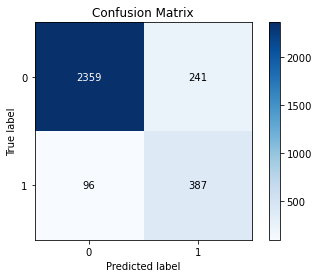

In [23]:
dtbagg_class = imbpipeline(
    [
     ('preprocessing', preprocessor),
     ('smote', SMOTE(random_state=1)),
     ('feature_selection', SelectKBest(score_func=f_classif, k=40)),
     ('classifier', BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=11,random_state=42), 
                                      n_estimators=300, bootstrap=True, random_state=42))
    ]
)

#Model Evaluation

dtbagg_class.fit(X_train, y_train)
y_pred_dt = dtbagg_class.predict(X_test)
print("accuracy_score:",accuracy_score(y_test, y_pred_dt))
print("roc_auc_score:",roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

plt_1 = skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=False)

In [24]:
# Gradient boosting classifier with feature selection

accuracy_score: 0.8971780733052221
roc_auc_score: 0.8488493390667303
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2600
           1       0.64      0.78      0.70       483

    accuracy                           0.90      3083
   macro avg       0.80      0.85      0.82      3083
weighted avg       0.91      0.90      0.90      3083



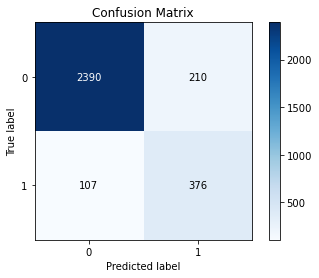

In [25]:
gdb_class = imbpipeline(
    [
     ('preprocessing', preprocessor),
     ('smote', SMOTE(random_state=1)),
     ('feature_selection', SelectKBest(score_func=f_classif, k=30)),
     #('classifier', GradientBoostingClassifier(learning_rate = 0.1,n_estimators = 500,random_state=42))
     ('classifier', GradientBoostingClassifier(random_state=32))
    ]
)

#Model Evaluation

gdb_class.fit(X_train, y_train)
y_pred_gdb = gdb_class.predict(X_test)
print("accuracy_score:",accuracy_score(y_test, y_pred_gdb))
print("roc_auc_score:",roc_auc_score(y_test, y_pred_gdb))
print(classification_report(y_test, y_pred_gdb))

plt_1 = skplt.metrics.plot_confusion_matrix(y_test, y_pred_gdb, normalize=False)